In [1]:
!rm -rf /Users/gil-arnaudcoche/Documents/ijoutaku/data/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/*_gt

zsh:1: no matches found: /Users/gil-arnaudcoche/Documents/ijoutaku/data/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/*_gt


In [2]:
import sys
sys.path.insert(0, '/Users/gil-arnaudcoche/Documents/ijoutaku/')

import time
import keras
import numpy as np
import matplotlib.pyplot as plt

from config.paths import TEST_PATH
from config.paths import MODELS_PATH

from lib.generators import SequenceDataGenerator
from lib.generators import ForwardDataGenerator

In [3]:
LSTM_CONVOLUTIONAL_AUTOENCODER = f'{MODELS_PATH}lstm-convolutional-autoencoder.hdf5'
LSTM_CONVOLUTIONAL_AUTOENCODER_FORWARD = f'{MODELS_PATH}lstm-convolutional-autoencoder-forward.hdf5'
LSTM_AUTOENCODER_FORWARD = f'{MODELS_PATH}lstm-autoencoder-forward.hdf5'

In [4]:
lstm_convolutional_autoencoder = keras.models.load_model(LSTM_CONVOLUTIONAL_AUTOENCODER)
lstm_convolutional_autoencoder_forward = keras.models.load_model(LSTM_CONVOLUTIONAL_AUTOENCODER_FORWARD)
lstm_autoencoder_forward = keras.models.load_model(LSTM_AUTOENCODER_FORWARD)

In [5]:
sequence_test_set = SequenceDataGenerator(TEST_PATH)
forward_test_set = ForwardDataGenerator(TEST_PATH)

In [6]:
mse = keras.losses.MeanSquaredError()

In [7]:
x = sequence_test_set[38][0][:, :, :, :, :]
x_predict = lstm_convolutional_autoencoder.predict(x)

1/1 [==============================] - 10s 10s/step


In [12]:
mse_values = np.zeros(x.shape[1])
for t in range(x.shape[1]):
    mse_values[t] = mse(x[1, t, :, :, 0], x_predict[1, t, :, :, 0])

In [16]:
1 + np.arange(0, SequenceDataGenerator._SEQUENCE_SIZE, SequenceDataGenerator._STRIDE_KERNEL)

array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
       131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191,
       196])

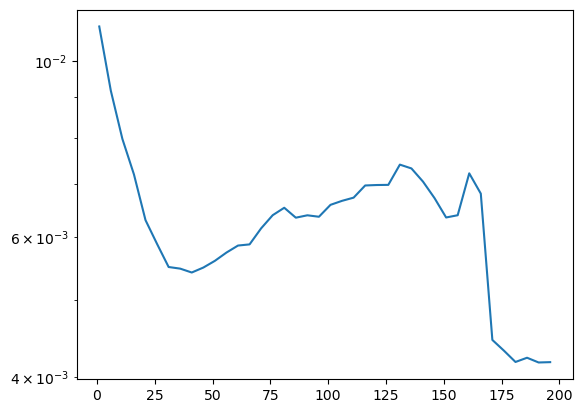

In [15]:
plt.plot(1 + np.arange(0, SequenceDataGenerator._SEQUENCE_SIZE, SequenceDataGenerator._STRIDE_KERNEL), mse_values)
plt.yscale('log')

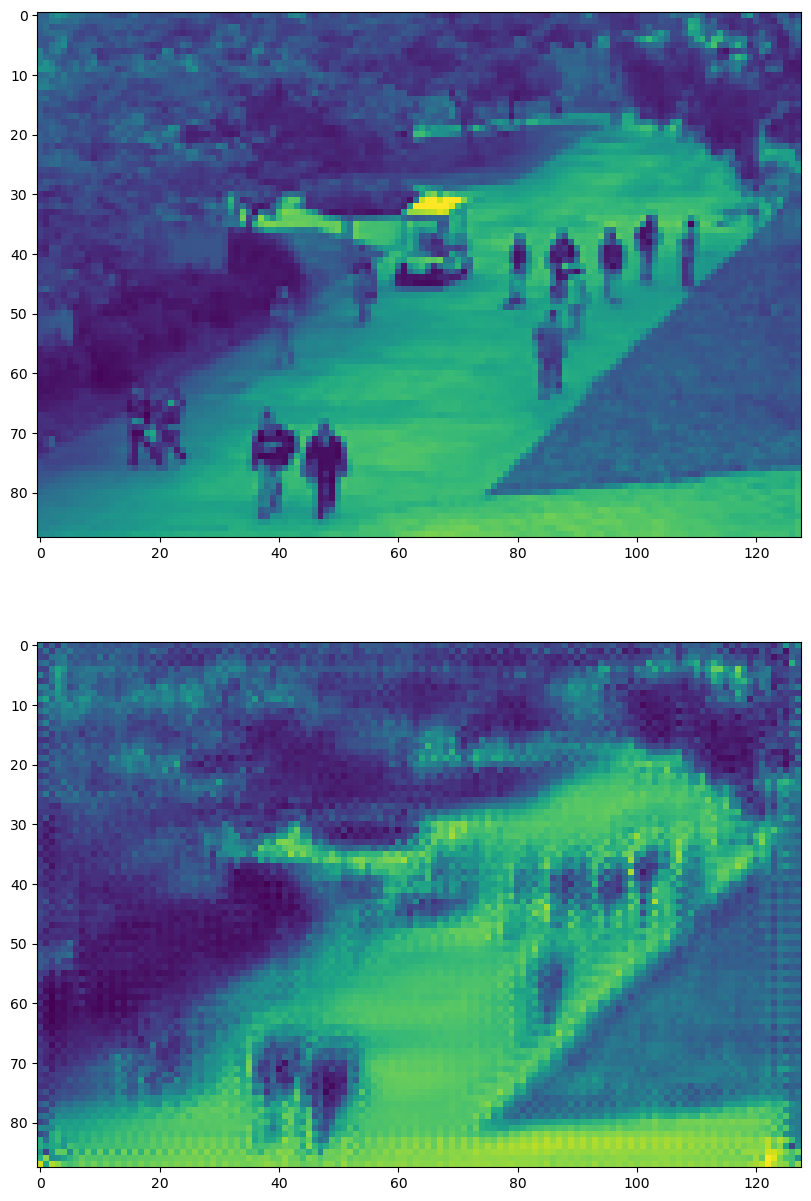

In [10]:
plt.figure(figsize=(15, 15))
plt.subplot(211)
plt.imshow(x[1, 20, :, :, 0])
plt.subplot(212)
plt.imshow(x_predict[1, 20, :, :, 0])